In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv('multiTimeline.csv', skiprows=1)

In [17]:
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


In [19]:
df.columns = ['month', 'diet', 'gym', 'finance']

In [20]:
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [23]:
# taking the time component
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

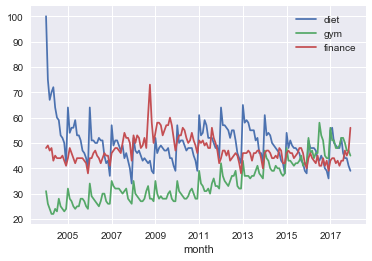

In [26]:
df.plot();

In [27]:
# Identify trends in data -> rolling mean

In [28]:
diet = df[['diet']]

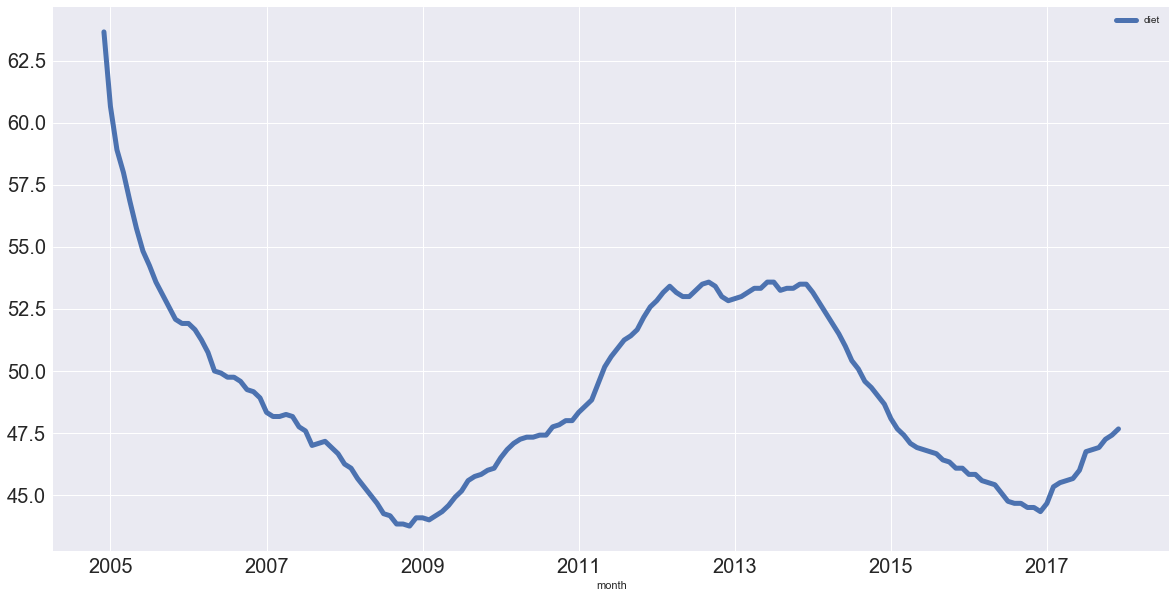

In [32]:
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)

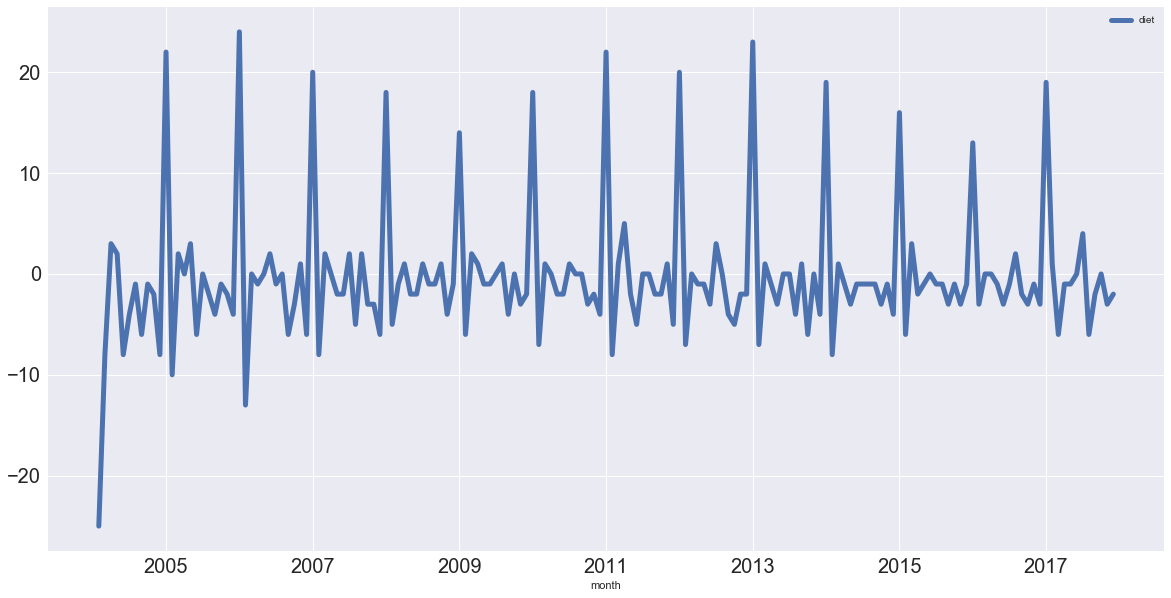

In [34]:
# find seasonality using first order differencing
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20);

In [35]:
# correlation between components -> captures both seasonal + trend
# seasonality of diet and gym are same. but trend is negatively correlated
# so both are negatively correlated

df.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


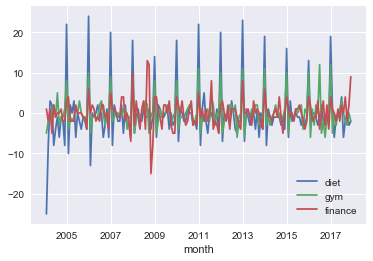

In [36]:
# check seasonality for all
df.diff().plot()

In [37]:
# remove trend and see correlation
df.diff().corr()

# now diet and gym are not negatively correlated

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


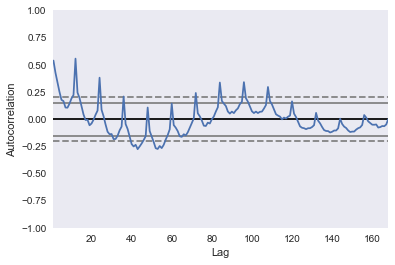

In [41]:
pd.plotting.autocorrelation_plot(diet);

### Forecast

Step1 : take log of values if they are skewed

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


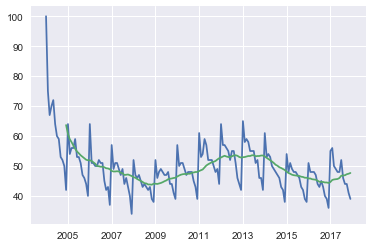

In [42]:
diet_rolling_avg = pd.rolling_mean(df.diet, 12) # rolling avg = remove seasonality with seasonality of 12 here
plt.plot(diet)
plt.plot(diet_rolling_avg)

In [70]:
data = pd.read_csv('AirPassengers.csv')
print data.head()
data.columns = ['Month', 'Passengers']

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [71]:
data['Month'] = pd.to_datetime(data['Month'])

In [72]:
data.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [73]:
data.set_index('Month', inplace=True)

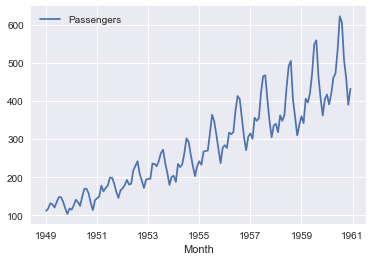

In [74]:
data.plot()

Step 2: Remove seasonality and check trend

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


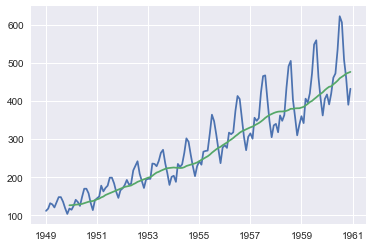

In [75]:
rolling_mean = pd.rolling_mean(data.Passengers, 12)
plt.plot(data.Passengers)
plt.plot(rolling_mean);

Step3: Check for stationarity

In [76]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.Passengers, autolag='AIC')

In [77]:
dftest

(0.81536887920603984,
 0.99188024343764092,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.5787700591715979,
  '5%': -2.8840418343195267},
 996.69293083901891)

    for dickey-fuller test, null hypothesis is that there is a unit root. -> non-stationary data
    Alternate -> no unit root
    P-value of 0.99 says that we can't reject the null hypothesis of unit root ie non-stationarity

Step4: Make it stationary

In [78]:
ts = data.Passengers

In [79]:
ts_log = np.log(ts)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


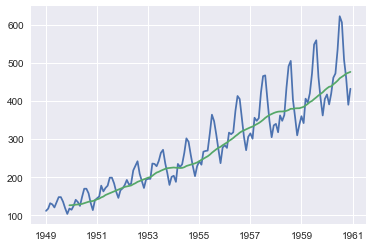

In [80]:
moving_avg = pd.rolling_mean(ts, 12)
plt.plot(ts)
plt.plot(moving_avg);

In [81]:
ts_log_moving_avg_diff = ts_log - moving_avg

In [82]:
ts_log_moving_avg_diff.dropna(inplace=True)

In [85]:
dftest = adfuller(ts_log_moving_avg_diff, autolag='AIC')
dftest

(0.83040423342667158,
 0.99211143031641025,
 2,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.5787700591715979,
  '5%': -2.8840418343195267},
 329.87086772937323)